In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt     #Number of Trips by Date
import geopandas as gpd  # Fixed import statement for geopandas
import folium
from folium import plugins
import folium
E_trip = pd.read_csv("/content/drive/MyDrive/E-Scooter_Trips_-_2020.csv")
E_trip


,Trip ID,Start Time,End Time,Trip Distance,Trip Duration,Vendor,Start Community Area Number,End Community Area Number,Start Community Area Name,End Community Area Name,Start Centroid Latitude,Start Centroid Longitude,Start Centroid Location,End Centroid Latitude,End Centroid Longitude,End Centroid Location
0,3eb9a2a3-3266-4559-b1ec-e83a6f7972ab,08/12/2020 05:00:00 AM,08/12/2020 05:00:00 AM,"1,153","1,027",spin,68.0,68.0,ENGLEWOOD,ENGLEWOOD,41.780068,-87.642266,POINT (-87.64226608 41.78006847),41.780068,-87.642266,POINT (-87.64226608 41.78006847)
1,82dd7b8f-8de0-4f25-829b-b32bf47e8419,08/12/2020 05:00:00 AM,08/12/2020 05:00:00 AM,17,91,spin,22.0,21.0,LOGAN SQUARE,AVONDALE,41.922903,-87.704301,POINT (-87.70430082 41.92290349),41.939283,-87.710757,POINT (-87.71075685 41.93928256)
2,9120cbf3-f749-49b6-b894-0e6e065cd731,08/12/2020 05:00:00 AM,08/12/2020 05:00:00 AM,"2,883",724,spin,3.0,6.0,UPTOWN,LAKE VIEW,41.965435,-87.655145,POINT (-87.65514456 41.96543532),41.943514,-87.657498,POINT (-87.65749768 41.9435138)
3,cf2e4abc-2649-49be-924b-468a1aefc4c8,08/12/2020 05:00:00 AM,08/12/2020 05:00:00 AM,5,21,spin,31.0,31.0,LOWER WEST SIDE,LOWER WEST SIDE,41.848335,-87.675179,POINT (-87.67517932 41.84833501),41.848335,-87.675179,POINT (-87.67517932 41.84833501)
4,0448afb5-ab64-4090-b528-e3050e7eb0f2,08/12/2020 07:00:00 AM,08/12/2020 07:00:00 AM,"1,179",245,spin,6.0,6.0,LAKE VIEW,LAKE VIEW,41.943514,-87.657498,POINT (-87.65749768 41.9435138),41.943514,-87.657498,POINT (-87.65749768 41.9435138)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630811,2c648499-436a-4244-bf2b-ce0041ee4129,12/12/2020 09:00:00 PM,12/12/2020 10:00:00 PM,"4,226","1,327",lime,11.0,11.0,JEFFERSON PARK,JEFFERSON PARK,41.978727,-87.768147,POINT (-87.76814656 41.97872681),41.978727,-87.768147,POINT (-87.76814656 41.97872681)
630812,72119cd3-18db-4a08-8da7-1639a6894a18,12/12/2020 09:00:00 PM,12/12/2020 09:00:00 PM,"1,822",211,spin,3.0,3.0,UPTOWN,UPTOWN,41.965435,-87.655145,POINT (-87.65514456 41.96543532),41.965435,-87.655145,POINT (-87.65514456 41.96543532)
630813,1e01298b-75e3-4a22-b440-388b093f7202,12/12/2020 09:00:00 PM,12/12/2020 10:00:00 PM,878,325,lime,28.0,24.0,NEAR WEST SIDE,WEST TOWN,41.874254,-87.664619,POINT (-87.66461906 41.87425419),41.901459,-87.675568,POINT (-87.67556756 41.90145875)
630814,cce935b2-3dc8-4e06-b913-a1fd37c652d0,12/12/2020 09:00:00 PM,12/12/2020 10:00:00 PM,294,"1,332",bird,7.0,7.0,LINCOLN PARK,LINCOLN PARK,41.921880,-87.645647,POINT (-87.64564651 41.92188043),41.921880,-87.645647,POINT (-87.64564651 41.92188043)


In [3]:
E_trip[E_trip.duplicated()].sum()

Trip ID                        0.0
Start Time                     0.0
End Time                       0.0
Trip Distance                  0.0
Trip Duration                  0.0
Vendor                         0.0
Start Community Area Number    0.0
End Community Area Number      0.0
Start Community Area Name      0.0
End Community Area Name        0.0
Start Centroid Latitude        0.0
Start Centroid Longitude       0.0
Start Centroid Location        0.0
End Centroid Latitude          0.0
End Centroid Longitude         0.0
End Centroid Location          0.0
dtype: float64

In [4]:
# Remove Comma from Values
E_trip["Trip Duration"] = E_trip["Trip Duration"].str.replace(",", "")
E_trip["Trip Distance"] = E_trip["Trip Distance"].str.replace(",", "")
# Convert Data Type to Int
E_trip["Trip Duration"] = E_trip["Trip Duration"].astype("int")
E_trip["Trip Distance"] = E_trip["Trip Distance"].astype("float")

In [5]:
# Convert Start Time Data Type to Datetime
E_trip['Start Time'] = pd.to_datetime(E_trip['Start Time'])

# Extract Date from Start Time Column
E_trip['Start Date'] = pd.to_datetime(E_trip['Start Time']).dt.date

E_trip['Start Date'] = pd.to_datetime(E_trip['Start Date'])

In [6]:
#Number of Trips by Date
ntd = E_trip['Start Date'].value_counts().reset_index()
ntd.columns = ['Date','Trips']

ntd.head()

,Date,Trips
0,2020-09-05,12868
1,2020-08-29,12327
2,2020-08-30,11724
3,2020-09-26,11364
4,2020-09-07,11120


In [7]:
# Averae Trips per day
atpd = ntd['Trips'].mean()
atpd

5128.585365853659

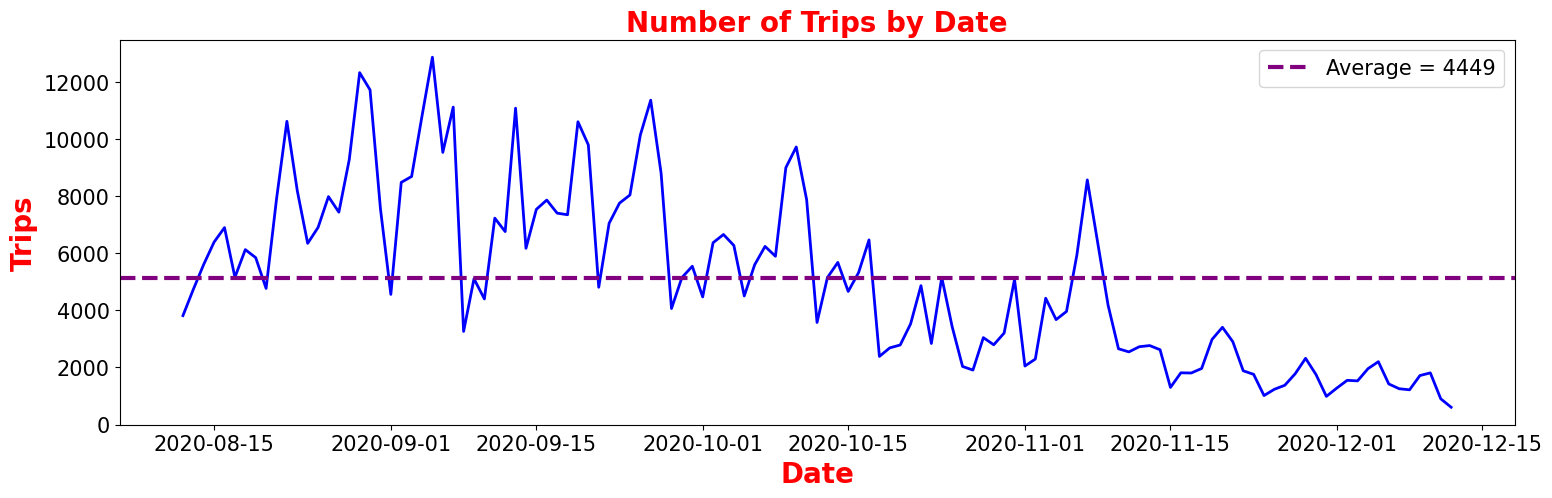

In [8]:
plt.figure(figsize = (18, 5))
plot = sns.lineplot(x = "Date", y = "Trips", data = ntd, color = "blue", linewidth = 2)
plot.axhline(atpd, linestyle="--", color="purple", label="Average = 4449", linewidth = 3)
plt.title("Number of Trips by Date", size = 20, color = "red", weight = "bold")
plt.xlabel("Date", size = 20, color = "red", weight = "bold")
plt.ylabel("Trips", size = 20, color = "red", weight = "bold")
plt.legend(prop={'size': 15})
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

#Trips constantly start to decrease below average after Noveber 07, 2020


In [9]:
#Number of Trips by Day of Week
# Extract Day Name from Start Date Column
E_trip["Day of Week"] = E_trip["Start Date"].dt.day_name()

In [10]:
cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
tdw =  E_trip['Day of Week'].value_counts().reindex(cats).reset_index()

tdw.columns = ["Day of Week", "Trips"]
tdw

,Day of Week,Trips
0,Monday,70336
1,Tuesday,68443
2,Wednesday,83594
3,Thursday,82570
4,Friday,101820
5,Saturday,123263
6,Sunday,100790


In [11]:
atdw = tdw["Trips"].mean()
atdw

90116.57142857143

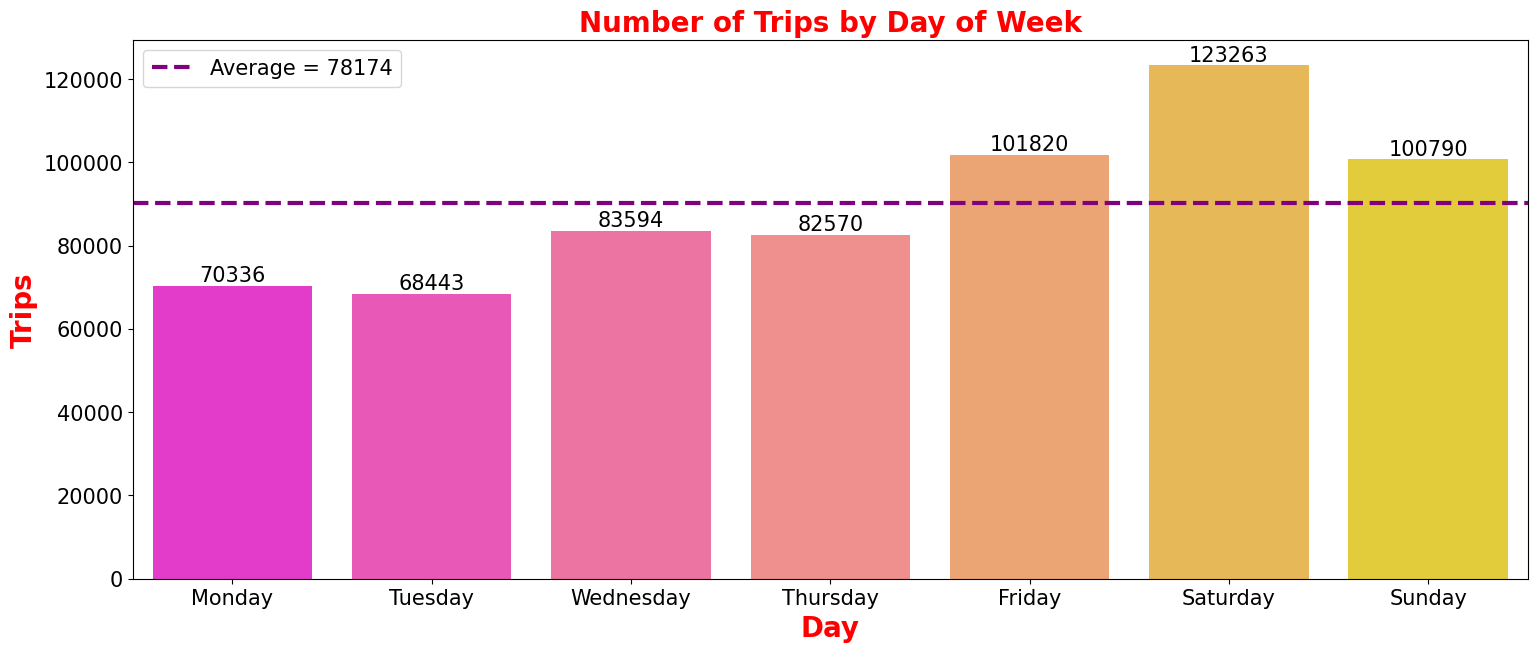

In [12]:
plt.figure(figsize = (18, 7))
plot = sns.barplot(x = "Day of Week", y = "Trips", data = tdw, palette = "spring")
for p in plot.patches:
        plot.annotate('{:.0f}'.format(p.get_height()),
                      (p.get_x()+0.4, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plot.axhline(atdw, linestyle="--", color="purple", label="Average = 78174", linewidth = 3)
plt.title("Number of Trips by Day of Week", size = 20, color = "red", weight = "bold")
plt.xlabel("Day", size = 20, color = "red", weight = "bold")
plt.ylabel("Trips", size = 20, color = "red", weight = "bold")
plt.legend(prop={'size': 15})
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

In [13]:
#Distribution of Trips over Hours of the Day

E_trip["Hour"] = E_trip["Start Time"].dt.hour

In [14]:
thd = E_trip["Hour"].value_counts().to_frame().sort_index().reset_index()
thd.columns = ["Hour", "Trips"]
thd

,Hour,Trips
0,0,17
1,1,12
2,2,7
3,3,39
4,4,21
5,5,3201
6,6,6271
7,7,10153
8,8,14597
9,9,17649


In [15]:
athd = thd["Trips"].mean()
athd

26284.0

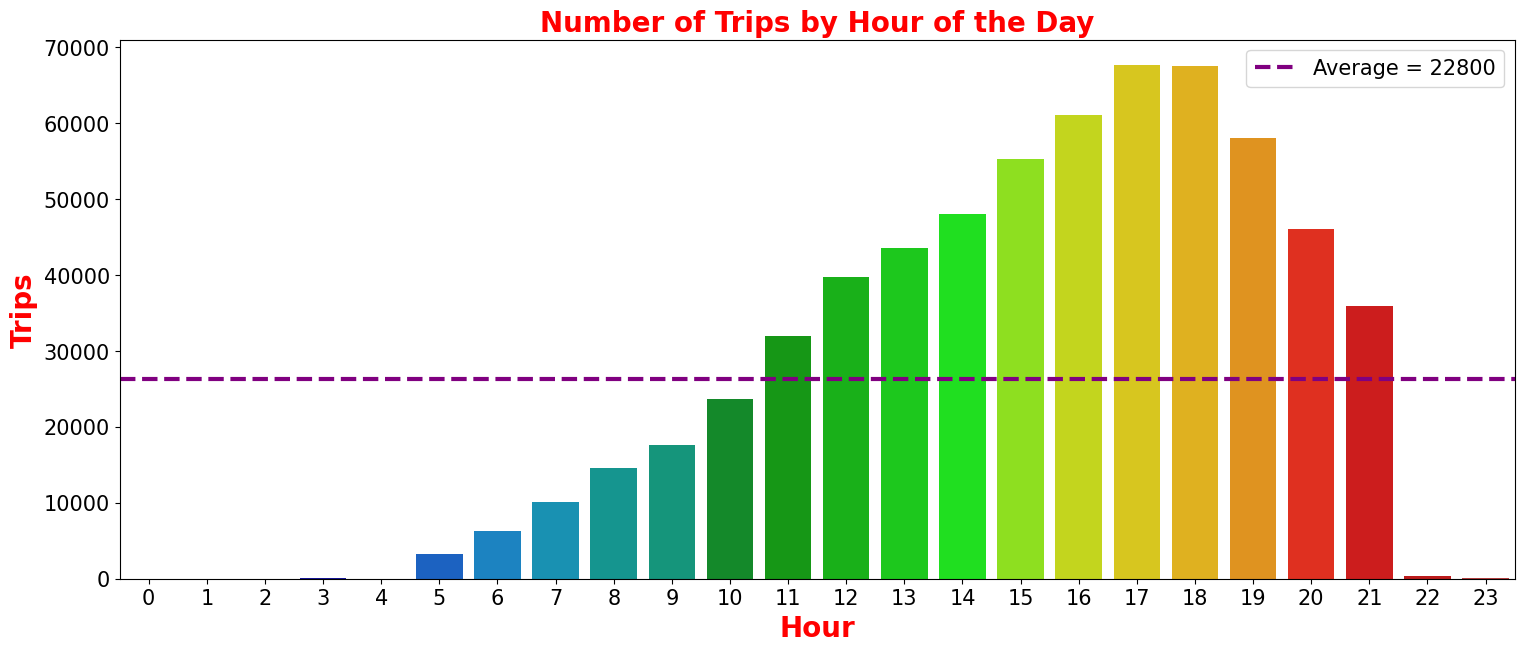

In [16]:
plt.figure(figsize = (18, 7))
plot = sns.barplot(x = "Hour", y = "Trips", data = thd, palette = "nipy_spectral")
plot.axhline(athd, linestyle="--", color="purple", label="Average = 22800", linewidth = 3)
plt.title("Number of Trips by Hour of the Day", size = 20, color = "red", weight = "bold")
plt.xlabel("Hour", size = 20, color = "red", weight = "bold")
plt.ylabel("Trips", size = 20, color = "red", weight = "bold")
plt.legend(prop={'size': 15})
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.show()

In [17]:
# Calculate the average trip distance (in miles or kilometers)
average_distance = E_trip['Trip Distance'].mean()

# Calculate the average trip duration (in seconds, minutes, or hours)
average_duration = E_trip['Trip Duration'].mean()

# Print the results
print(f'Average Trip Distance: {average_distance} miles')
print(f'Average Trip Duration: {average_duration} seconds')


Average Trip Distance: 2909.7930553441893 miles
Average Trip Duration: 996.0292303936488 seconds


In [19]:
E_trip['Trips'] = ntd['Trips']

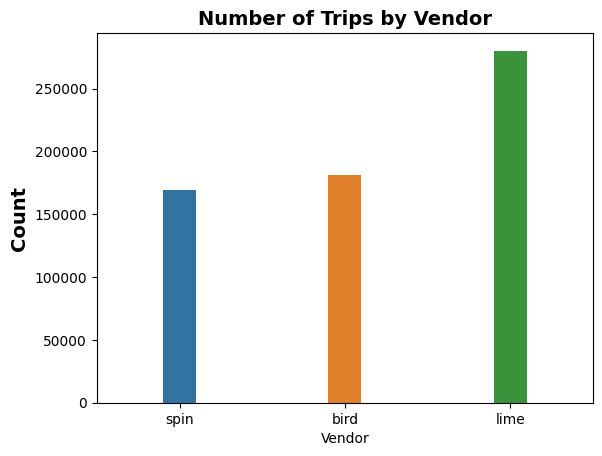

In [20]:
#Bar chart of 'Vendor' counts
# Create a countplot with custom bar width
sns.countplot(x='Vendor', data=E_trip, width=0.2)  # Adjust the width as needed
plt.xlabel('Vendor')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Number of Trips by Vendor', fontsize=14, fontweight='bold')
plt.show()

In [21]:
#. Number of Trips by Start Community Area:
trips_by_start_area = E_trip["Start Community Area Name"].value_counts()
print("Number of Trips by Start Community Area:")
print(trips_by_start_area)

Number of Trips by Start Community Area:
LAKE VIEW         99318
LINCOLN PARK      80704
WEST TOWN         61413
NEAR WEST SIDE    32739
LOGAN SQUARE      29330
                  ...  
FOREST GLEN         177
LOOP                159
BURNSIDE            147
EDISON PARK          31
OHARE                15
Name: Start Community Area Name, Length: 77, dtype: int64


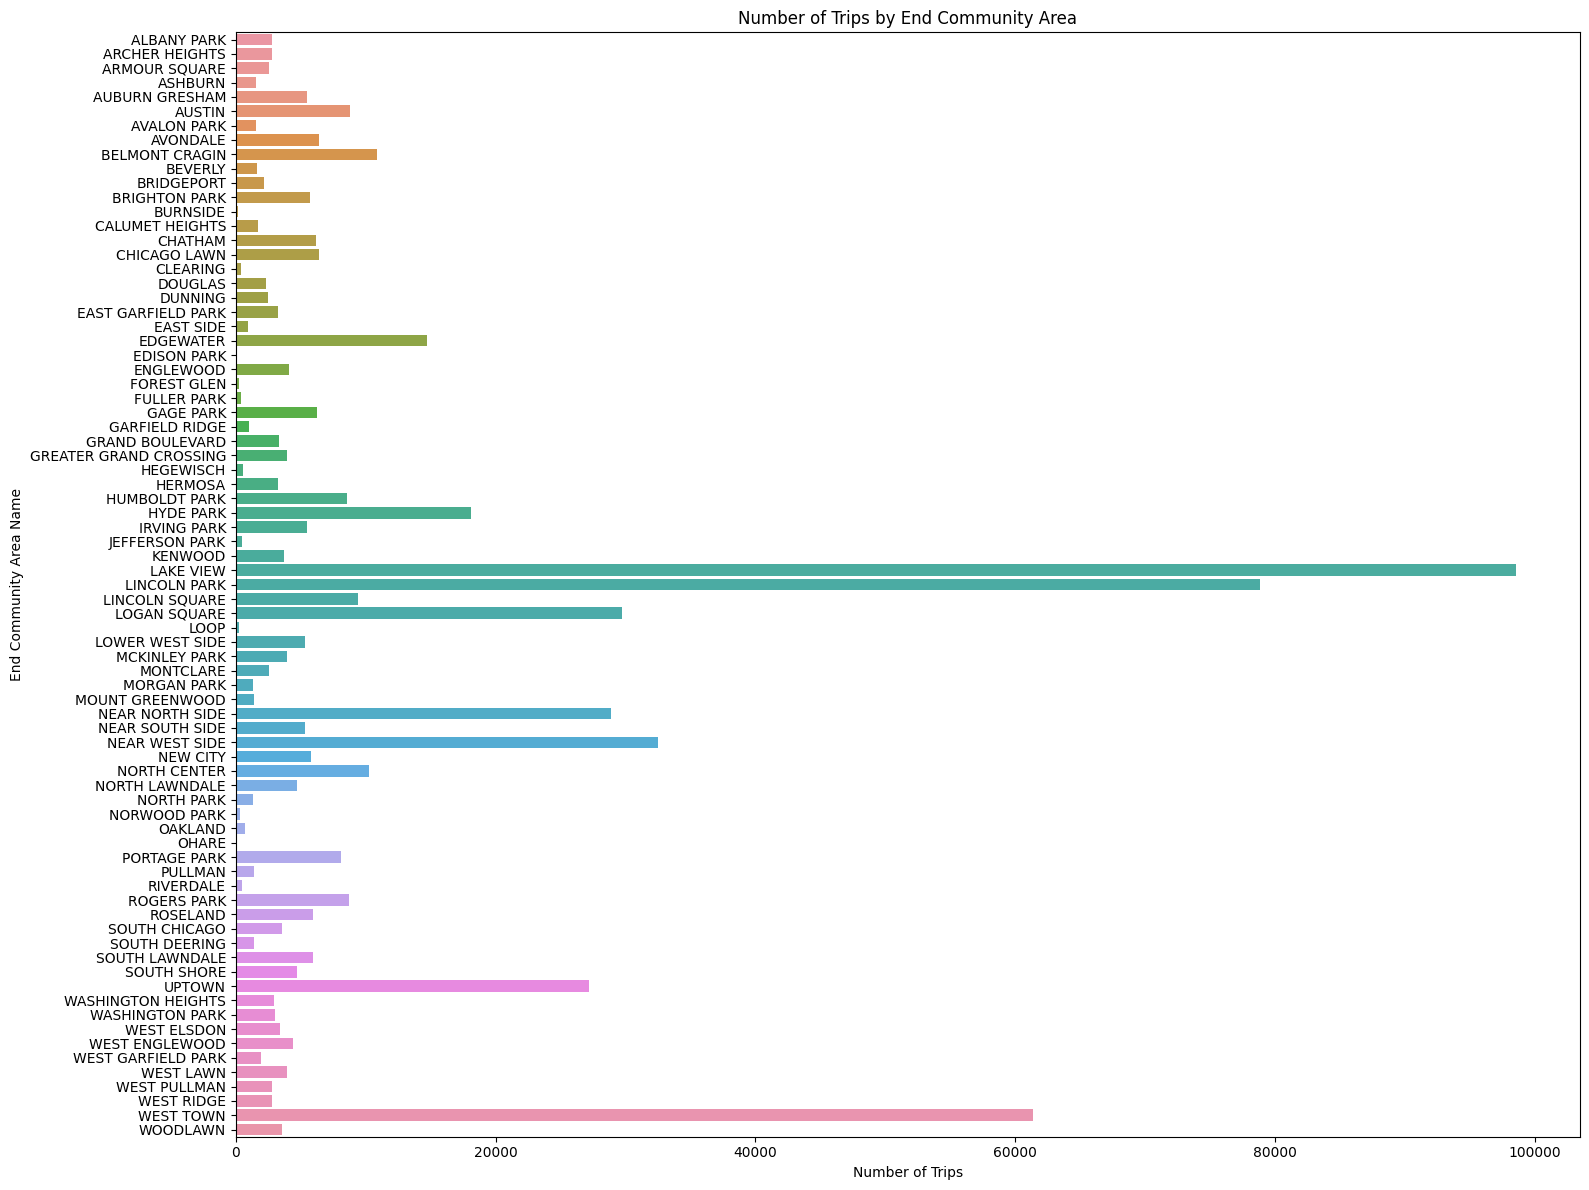

In [22]:

# Assuming you have a DataFrame named 'E_trip' with 'End Community Area Name'
# and 'Number of Trips' columns

# Group by 'End Community Area Name' and count the number of trips for each area
trips_by_end_area = E_trip.groupby('End Community Area Name')['Trip ID'].count().reset_index()
trips_by_end_area.columns = ['End Community Area Name', 'Number of Trips']

# Create a bar chart
plt.figure(figsize=(16, 12) ) # Optional: Set the figure size
sns.barplot(x='Number of Trips',y='End Community Area Name', data=trips_by_end_area, orient='h')
plt.xlabel('Number of Trips')
plt.ylabel('End Community Area Name')
plt.title('Number of Trips by End Community Area')
plt.xticks(rotation=0)  # Keep y-axis labels horizontal
plt.tight_layout()  # Optional: Adjust layout for better label display
plt.show()


Most Common Start Community Area: LAKE VIEW


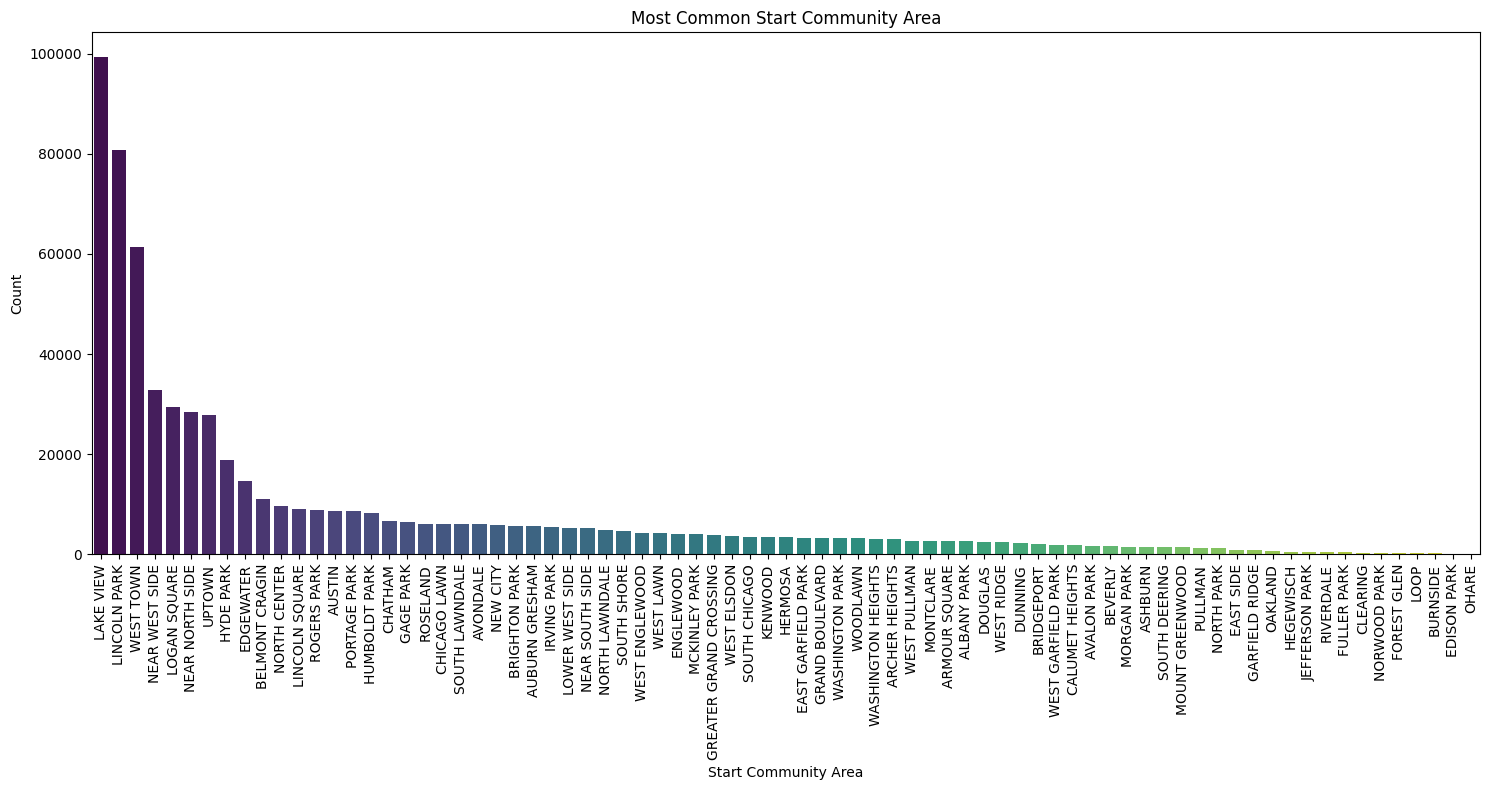

In [23]:
#Most Common Start Community Area
most_common_start_area = E_trip["Start Community Area Name"].mode().iloc[0]
print("Most Common Start Community Area:", most_common_start_area)

# Count the occurrences of each start community area
start_area_counts = E_trip["Start Community Area Name"].value_counts()

# Create a bar chart
plt.figure(figsize=(15, 8))
sns.barplot(x=start_area_counts.index, y=start_area_counts.values, palette="viridis")
plt.xlabel("Start Community Area")
plt.ylabel("Count")
plt.title("Most Common Start Community Area")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

In [24]:
list(E_trip.columns)

['Trip ID',
 'Start Time',
 'End Time',
 'Trip Distance',
 'Trip Duration',
 'Vendor',
 'Start Community Area Number',
 'End Community Area Number',
 'Start Community Area Name',
 'End Community Area Name',
 'Start Centroid Latitude',
 'Start Centroid Longitude',
 'Start Centroid Location',
 'End Centroid Latitude',
 'End Centroid Longitude',
 'End Centroid Location',
 'Start Date',
 'Day of Week',
 'Hour',
 'Trips']

In [25]:
E_trip.to_csv('/content/E_2020.csv', index=False)


In [26]:
!pip install pyspark

from pyspark.sql import SparkSession


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=e056e8334894a7b6cf176597da426195f0377ef6ebacbde2cff556cb21d1f3d0
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [27]:
spark = SparkSession.builder.appName("MySparkSession").getOrCreate()

In [28]:
df = spark.read.csv("/content/E_2020.csv", header=True, inferSchema=True)


In [29]:
df.createOrReplaceTempView("my_table")


In [30]:
# 1. Calculate the total trip distance for each vendor
query1 = "SELECT Vendor, SUM(`Trip Distance`) AS TotalDistance FROM my_table GROUP BY Vendor"

spark.sql(query1).show()


+------+-------------+
|Vendor|TotalDistance|
+------+-------------+
|  spin|  5.6981084E8|
|  lime| 5.88243083E8|
|  bird| 6.77490093E8|
+------+-------------+



In [31]:
# 2. Find the average trip duration for each vendor
query2 = "SELECT Vendor, AVG(`Trip Duration`) AS AverageDuration FROM my_table GROUP BY Vendor"
spark.sql(query2).show()


+------+------------------+
|Vendor|   AverageDuration|
+------+------------------+
|  spin|1010.0427554564808|
|  lime| 1030.965914770861|
|  bird| 928.8947586321107|
+------+------------------+



In [32]:
# 3. Calculathe total number of trips for each community area
query3 = "SELECT `Start Community Area Name`, COUNT(*) AS TotalTrips FROM my_table GROUP BY `Start Community Area Name`"
spark.sql(query3).show()

+-------------------------+----------+
|Start Community Area Name|TotalTrips|
+-------------------------+----------+
|            BRIGHTON PARK|      5683|
|             LINCOLN PARK|     80704|
|                MONTCLARE|      2624|
|                  HERMOSA|      3343|
|                     LOOP|       159|
|           BELMONT CRAGIN|     11041|
|                 ROSELAND|      6127|
|                  OAKLAND|       609|
|          WASHINGTON PARK|      3274|
|     GREATER GRAND CRO...|      3794|
|           AUBURN GRESHAM|      5631|
|              SOUTH SHORE|      4546|
|           SOUTH LAWNDALE|      6046|
|           GARFIELD RIDGE|       845|
|                     NULL|       882|
|           LINCOLN SQUARE|      8965|
|              EDISON PARK|        31|
|                  DOUGLAS|      2461|
|              FULLER PARK|       376|
|              IRVING PARK|      5484|
+-------------------------+----------+
only showing top 20 rows



In [33]:
# 4. Find the date with the highest total trip distance
query4 = "SELECT `Start Date`, SUM(`Trip Distance`) AS TotalDistance FROM my_table GROUP BY `Start Date` ORDER BY TotalDistance DESC LIMIT 1"
spark.sql(query4).show()


+----------+-------------+
|Start Date|TotalDistance|
+----------+-------------+
|2020-09-05|  4.0556994E7|
+----------+-------------+



In [34]:
spark.stop()

In [35]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import avg, count, max

# Create a Spark session
spark = SparkSession.builder.appName("TripAnalysis").getOrCreate()

# Load your dataset into a DataFrame (Replace 'your_data.csv' with your dataset file)
df = spark.read.csv("/content/E_2020.csv", header=True)

In [36]:
long_trips_df = df.filter(df["Trip Duration"] > 30)
long_trips_df.show()

+--------------------+-------------------+--------------------+-------------+-------------+------+---------------------------+-------------------------+-------------------------+-----------------------+-----------------------+------------------------+-----------------------+---------------------+----------------------+---------------------+----------+-----------+----+-------+
|             Trip ID|         Start Time|            End Time|Trip Distance|Trip Duration|Vendor|Start Community Area Number|End Community Area Number|Start Community Area Name|End Community Area Name|Start Centroid Latitude|Start Centroid Longitude|Start Centroid Location|End Centroid Latitude|End Centroid Longitude|End Centroid Location|Start Date|Day of Week|Hour|  Trips|
+--------------------+-------------------+--------------------+-------------+-------------+------+---------------------------+-------------------------+-------------------------+-----------------------+-----------------------+----------------

In [37]:
day_of_week_count = df.groupBy("Day of Week").agg(count("*").alias("count"))
day_of_week_count.show()

+-----------+------+
|Day of Week| count|
+-----------+------+
|  Wednesday| 83594|
|    Tuesday| 68443|
|     Friday|101820|
|   Thursday| 82570|
|   Saturday|123263|
|     Monday| 70336|
|     Sunday|100790|
+-----------+------+



In [38]:
avg_distance = df.agg(avg("Trip Distance"))
avg_distance.show()

+------------------+
|avg(Trip Distance)|
+------------------+
|2909.7930553441893|
+------------------+



In [39]:
most_common_vendor = df.groupBy("Vendor").agg(count("*").alias("count")).orderBy("count", ascending=False)
most_common_vendor.show()

+------+------+
|Vendor| count|
+------+------+
|  lime|280092|
|  bird|181155|
|  spin|169569|
+------+------+



In [40]:
df = df.withColumn("Hour", df["Hour"].cast("int"))


avg_duration_per_hour = df.groupBy("Hour").agg(avg("Trip Duration")).orderBy("Hour", ascending=True)
avg_duration_per_hour.show(24, truncate=False)

+----+------------------+
|Hour|avg(Trip Duration)|
+----+------------------+
|0   |822.5294117647059 |
|1   |749.75            |
|2   |1551.5714285714287|
|3   |3137.769230769231 |
|4   |1017.1428571428571|
|5   |763.2114964073727 |
|6   |623.5370754265667 |
|7   |626.5774647887324 |
|8   |666.7079536891142 |
|9   |765.1482236953935 |
|10  |833.6979175484636 |
|11  |870.5916924713022 |
|12  |910.7220023693696 |
|13  |965.0152804864059 |
|14  |1021.4663506517807|
|15  |1047.8164449425203|
|16  |1078.7642150044996|
|17  |1046.3005251090897|
|18  |1052.6425674875682|
|19  |1084.4650725786987|
|20  |1088.46783625731  |
|21  |1061.3983138095105|
|22  |1294.0535117056857|
|23  |1616.8            |
+----+------------------+



In [41]:
from pyspark.sql import functions as F
from pyspark.sql.window import Window

window_spec = Window.partitionBy("Vendor").orderBy(F.col("Trip Distance").desc())

ranked_df = df.withColumn("Rank", F.dense_rank().over(window_spec))
second_highest_distance = ranked_df.filter(F.col("Rank") == 2)

second_highest_distance.show()

+--------------------+-------------------+--------------------+-------------+-------------+------+---------------------------+-------------------------+-------------------------+-----------------------+-----------------------+------------------------+-----------------------+---------------------+----------------------+---------------------+----------+-----------+----+-----+----+
|             Trip ID|         Start Time|            End Time|Trip Distance|Trip Duration|Vendor|Start Community Area Number|End Community Area Number|Start Community Area Name|End Community Area Name|Start Centroid Latitude|Start Centroid Longitude|Start Centroid Location|End Centroid Latitude|End Centroid Longitude|End Centroid Location|Start Date|Day of Week|Hour|Trips|Rank|
+--------------------+-------------------+--------------------+-------------+-------------+------+---------------------------+-------------------------+-------------------------+-----------------------+-----------------------+----------